In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 경고메세지 처리
import warnings

# 한글설치
plt.rc('font', family = 'Malgun Gothic')

# 음수표시
plt.rc('axes', unicode_minus = False)

# 실행결과 경고메세지 출력제외
warnings.filterwarnings('ignore')

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df = pd.read_csv('bank2.csv')
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14,0,0.0,213.892709,0.0,16,34.340882


In [62]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3748.000000,3748.000000,3748.000000,3734.000000,3543.000000,3748.000000,3718.000000,3711.000000,3692.000000,3748.000000,3748.000000
mean,0.092049,19483.564568,75117.309232,106791.045795,9.130398,0.161153,0.269769,180.873315,1.028982,21.649680,34.130636
std,0.289134,11404.260479,44861.197182,54374.991076,7.637535,0.602606,0.790790,82.507487,1.555433,9.557532,8.372096
min,0.000000,1700.000000,4641.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,47843.000000,70238.000000,3.000000,0.000000,0.000000,118.625765,0.000000,15.000000,29.397564
50%,0.000000,17100.000000,66581.000000,93676.500000,7.000000,0.000000,0.000000,177.085845,0.000000,21.000000,35.024732
75%,0.000000,23900.000000,92353.750000,122423.750000,14.000000,0.000000,0.000000,230.272746,2.000000,26.000000,39.147195
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,71.000000,203.312149


# BAD 관련 변수 시각화

In [10]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


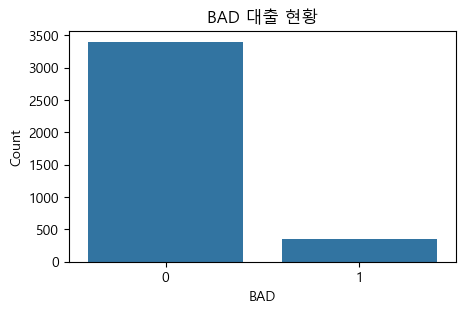

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(x='BAD', data=df)
plt.title('BAD 대출 현황')
plt.xlabel('BAD')
plt.ylabel('Count')
plt.show()

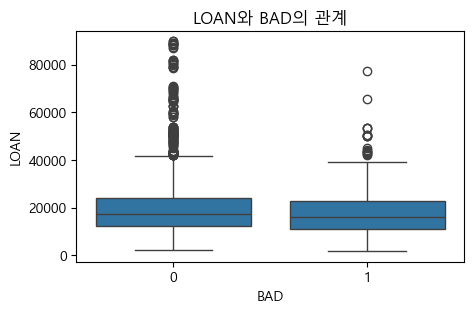

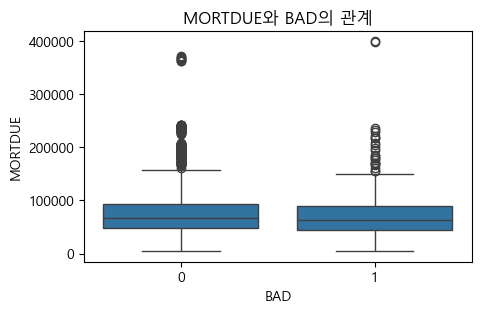

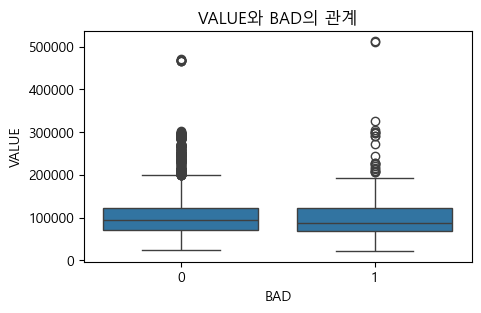

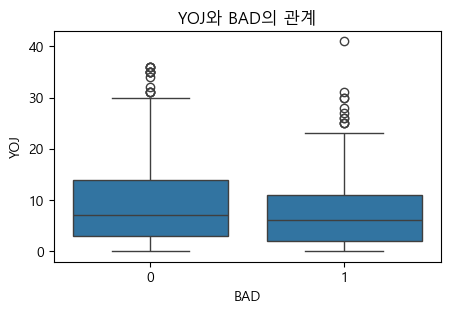

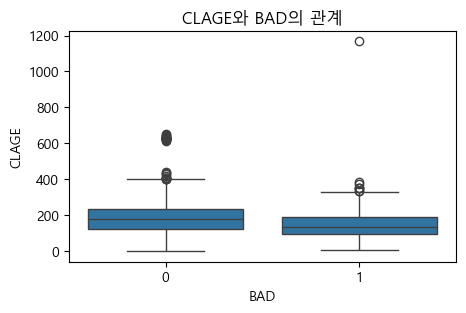

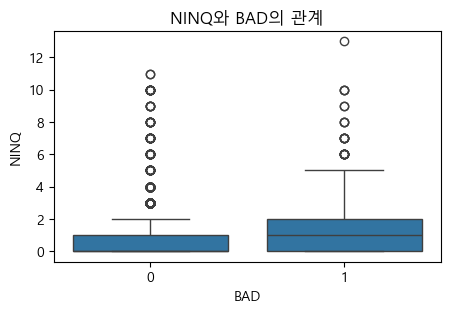

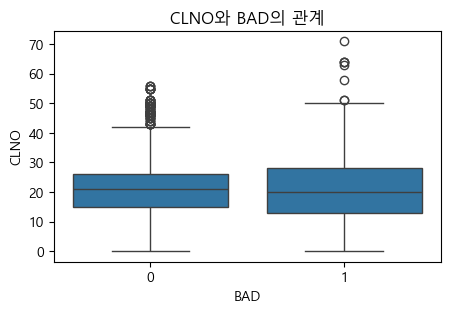

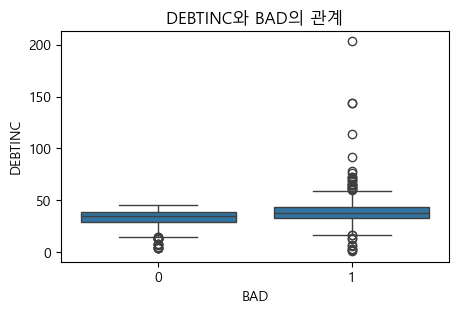

In [25]:
variables = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for var in variables:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='BAD', y=var, data=df)
    plt.title(f'{var}와 BAD의 관계')
    plt.xlabel('BAD')
    plt.ylabel(var)
    plt.show()

# DEBTINC와 BAD 시각화

In [ ]:
# BAD변수 1과0의 DEBTINC 값 차이가 확인됨

# 이 부분을 t-test를 통해 확인해봄

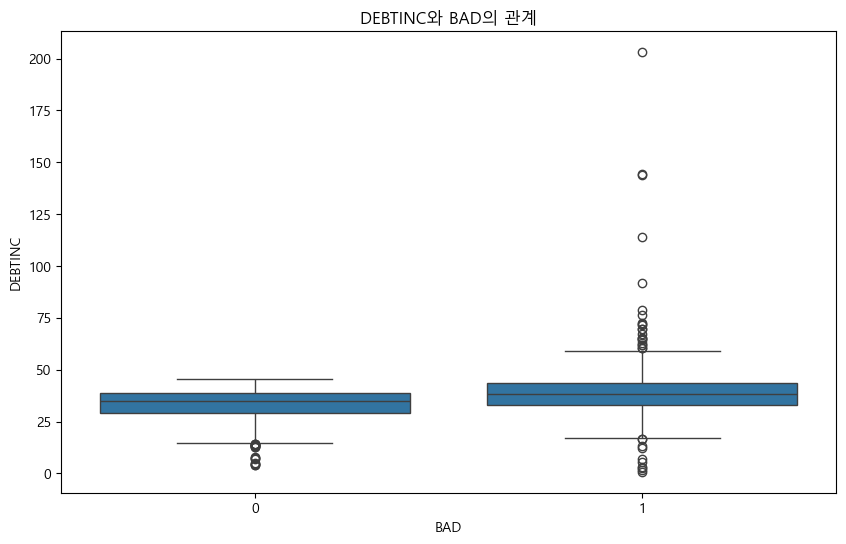

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='DEBTINC', data=df)
plt.title('DEBTINC와 BAD의 관계')
plt.xlabel('BAD')
plt.ylabel(var)
plt.show()

In [71]:
df_1 = df[df['BAD'] == 0]
df_2 = df[df['BAD'] == 1]

In [73]:
stats.bartlett(df_1['DEBTINC'], df_2['DEBTINC'])

# p-value가 0.05 이하이므로 귀무가설을 기각한다.. 즉, 두 집단의 분산은 다르다(이분산임)

BartlettResult(statistic=916.3355000730879, pvalue=2.7587637940426846e-201)

In [75]:
t_result = stats.ttest_ind(df_1['DEBTINC'], df_2['DEBTINC'], equal_var = False)

t, p = t_result.statistic, t_result.pvalue

print('2-Sample t-test')
print(f't : {t}')
print(f'p-value : {p}')

# p-value가 0.05이하이므로 귀무가설을 기각한다. 즉, 두 집단의 평균은 다르다.

2-Sample t-test
t : -6.677949760418371
p-value : 9.379516620089324e-11


In [ ]:
# 조금 더 구체적인 값을 확인하기 위해 두 값을 함께 그래프로 표현
# DEBTINC가 약 50인 구간에서 BAD 1과 0의 유의미한 차이가 발견됨

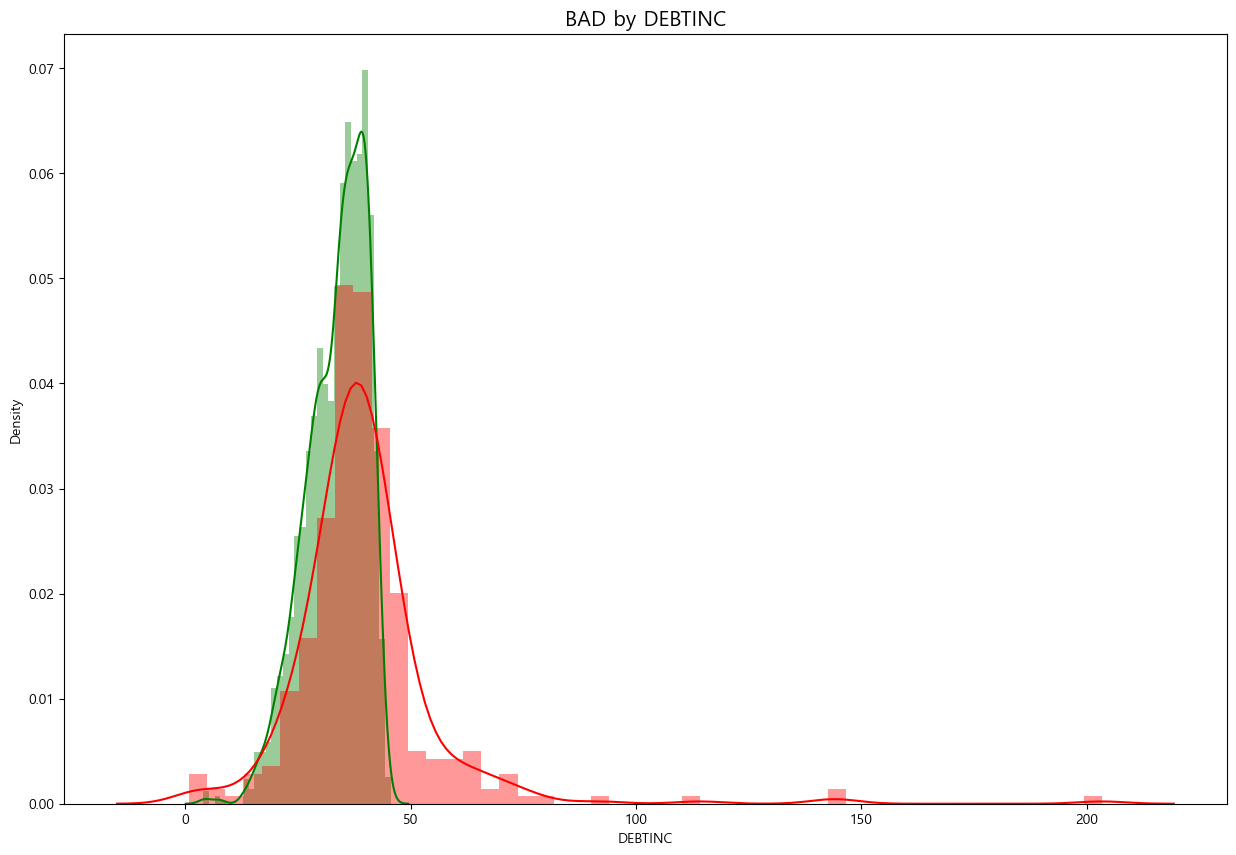

In [77]:
plt.figure(figsize=(15,10))

sns.distplot(df[df['BAD'] == 0]["DEBTINC"], color='green')
sns.distplot(df[df['BAD'] == 1]["DEBTINC"], color='red')
plt.title('BAD by DEBTINC', fontsize=15)
plt.show()

In [ ]:
# DTI가 50% 이상인 사람들이 대출 상환을 잘하지 못하는 상황을 통해 고위험 대출자를 식별하고, 대출 정책을 강화하며, 
#맞춤형 재정 상담과 금융 교육 프로그램을 제공하는 등의 조치를 취할 수 있습니다. 
# 이를 통해 대출 부실 위험을 줄이고, 고객의 재정 관리를 개선할 수 있습니다

# YOJ BAD 시각화

In [ ]:
# BAD변수 1과0의 YOJ 값 차이가 확인됨

# 이 부분을 t-test를 통해 확인해봄

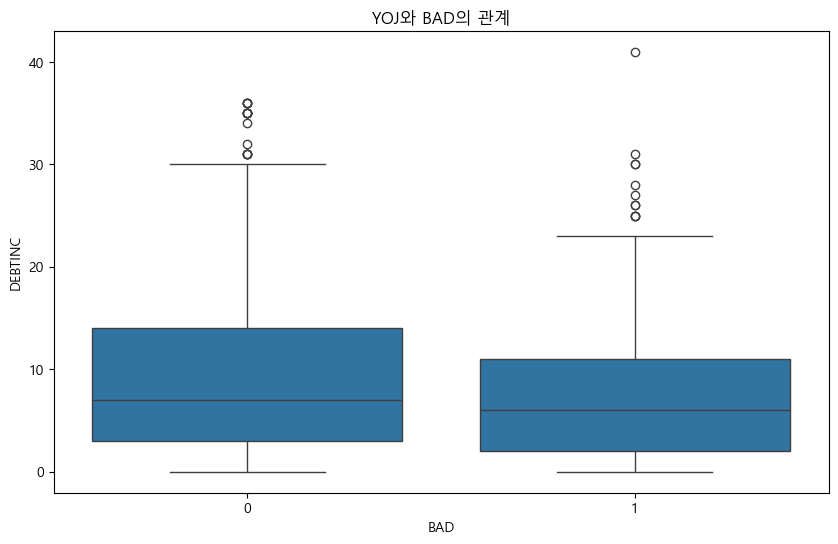

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BAD', y='YOJ', data=df)
plt.title('YOJ와 BAD의 관계')
plt.xlabel('BAD')
plt.ylabel(var)
plt.show()

In [7]:
df_1 = df[df['BAD'] == 0]
df_2 = df[df['BAD'] == 1]

In [9]:
stats.bartlett(df_1['YOJ'], df_2['YOJ'])

# p-value가 0.05 이하이므로 귀무가설을 기각. 즉, 두 집단의 분산은 다르다(이분산)

BartlettResult(statistic=12.229209619229547, pvalue=0.0004704712419252581)

In [33]:
t_result = stats.ttest_ind(df_1['YOJ'], df_2['YOJ'], equal_var=False)

t, p = t_result.statistic, t_result.pvalue

print('2-Sample t-test')
print(f't : {t}')
print(f'p-value : {p}')

# p-value가 0.05이하이므로 귀무가설을 기각한다. 즉, 두 집단의 평균은 다르다.

2-Sample t-test
t : 4.466907686355771
p-value : 1.0087106462475703e-05


In [ ]:
# 조금 더 구체적인 값을 확인하기 위해 두 값을 함께 그래프로 표현
# YOJ가 약 15인 구간에서 BAD 1과 0의 유의미한 차이가 발견됨

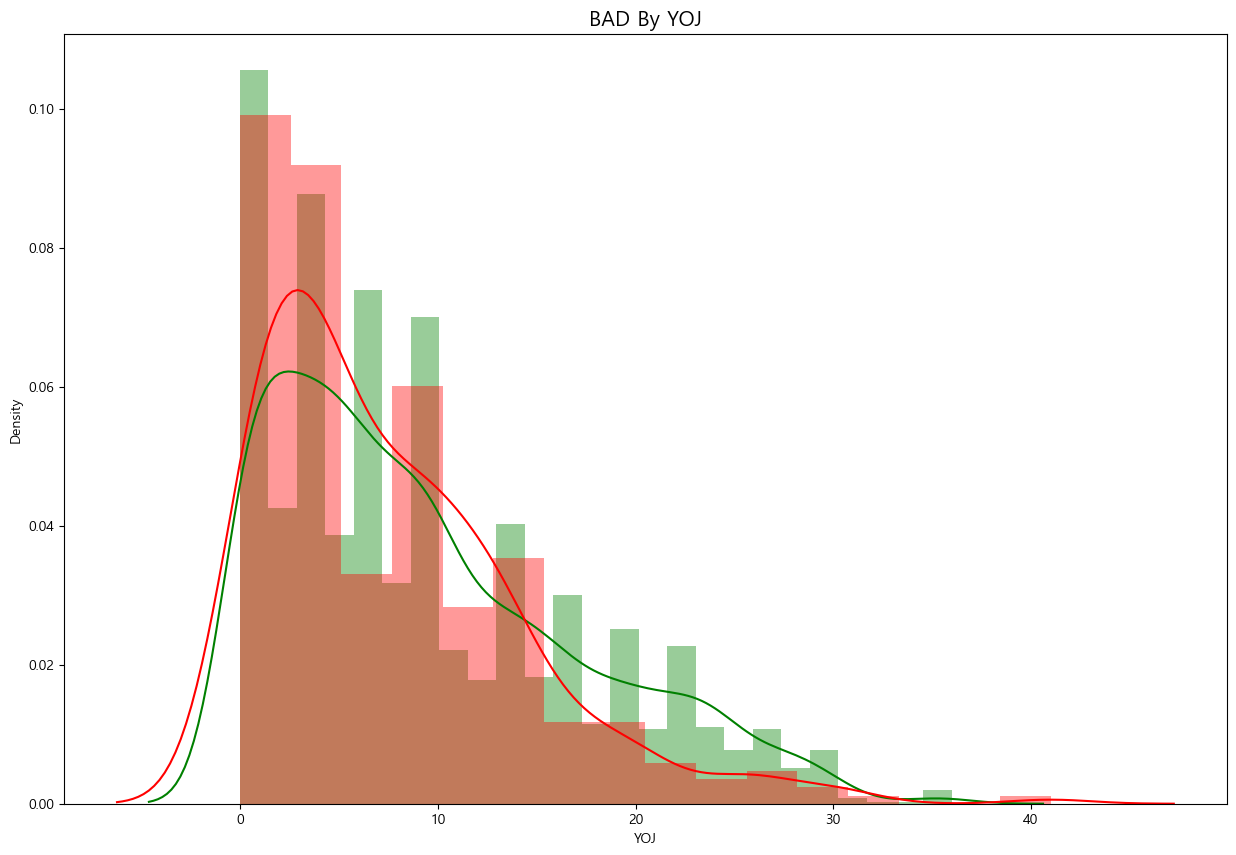

In [60]:
plt.figure(figsize=(15,10))

sns.distplot(df[df['BAD'] == 0]["YOJ"], color='green')
sns.distplot(df[df['BAD'] == 1]["YOJ"], color='red')
plt.title('BAD By YOJ', fontsize=15)
plt.show()

# REASON과 BAD의 관계확인

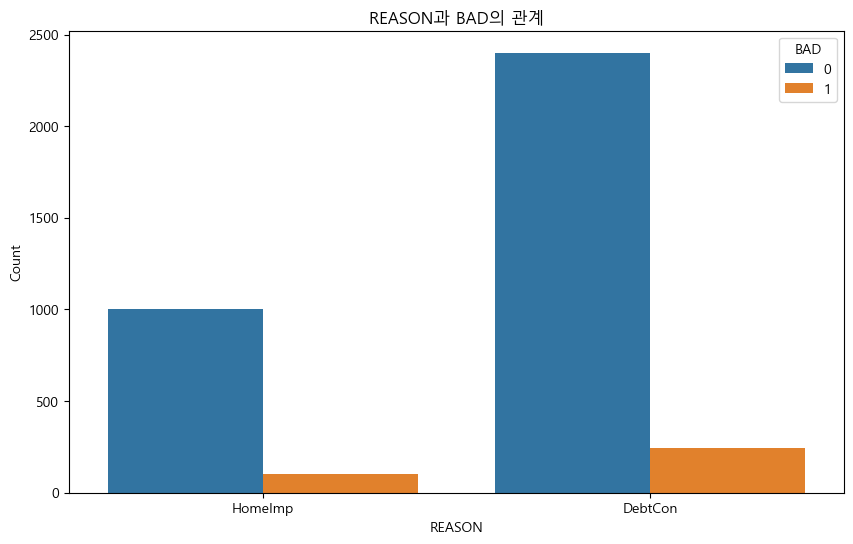

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='REASON', hue='BAD', data=df)
plt.title('REASON과 BAD의 관계')
plt.xlabel('REASON')
plt.ylabel('Count')
plt.show()

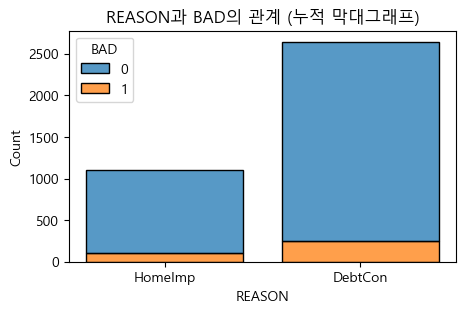

In [33]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='REASON', hue='BAD', multiple='stack', shrink=0.8)
plt.title('REASON과 BAD의 관계 (누적 막대그래프)')
plt.xlabel('REASON')
plt.ylabel('Count')
plt.show()

# JOB과 BAD의 관계확인

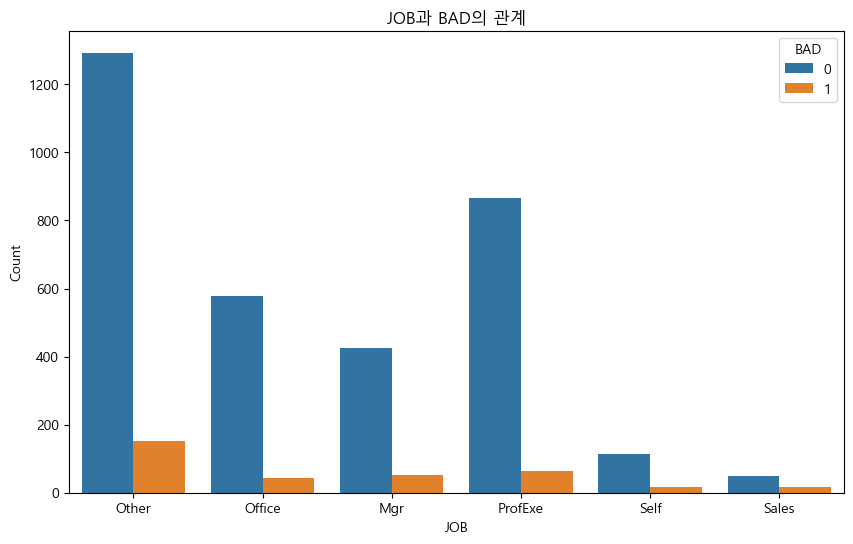

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JOB', hue='BAD', data=df)
plt.title('JOB과 BAD의 관계')
plt.xlabel('JOB')
plt.ylabel('Count')
plt.show()

In [39]:
crosstab_result = pd.crosstab(df['BAD'], df['JOB'])
crosstab_result

JOB,Mgr,Office,Other,ProfExe,Sales,Self,Unknown
BAD,,,,,,,
0,424,579,1293,865,48,114,80
1,53,44,151,64,16,16,1


In [41]:
chi, pval, dof, expected = stats.chi2_contingency(crosstab_result)

print('chi square test')
print('chi2 : {0:.3f}'.format(chi))
print('p-value : {0:.3f}'.format(pval))
print('degree of freedom : {0:.3f}'.format(dof))
print('expected value : \n{}'.format(expected))

chi square test
chi2 : 40.924
p-value : 0.000
degree of freedom : 6.000
expected value : 
[[ 433.09258271  565.65341515 1311.08110993  843.48639274   58.10885806
   118.03361793   73.54402348]
 [  43.90741729   57.34658485  132.91889007   85.51360726    5.89114194
    11.96638207    7.45597652]]


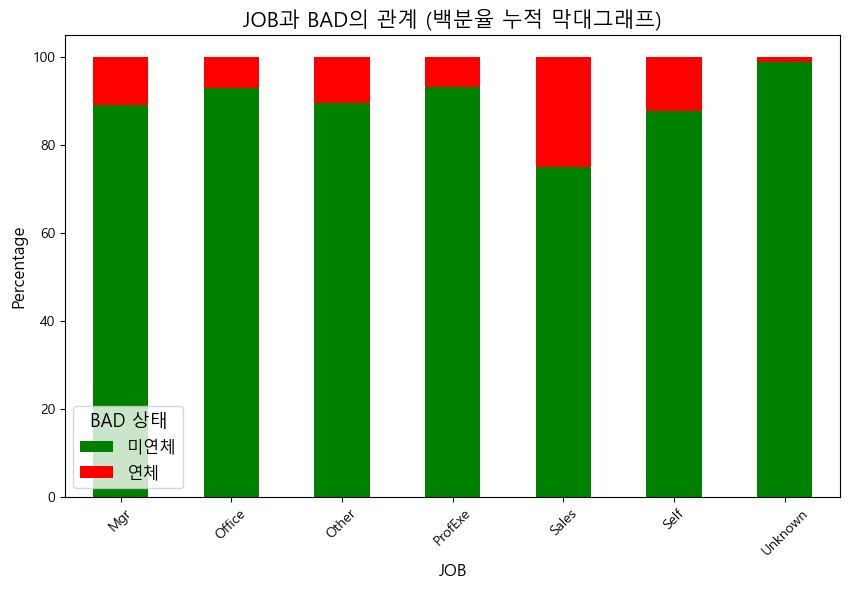

In [37]:
job_counts = df.groupby(['JOB', 'BAD']).size().unstack(fill_value=0)
job_percentages = job_counts.div(job_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
job_percentages.plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', 'red'])

# 범례 및 라벨 설정
plt.title('JOB과 BAD의 관계 (백분율 누적 막대그래프)', fontsize=15)
plt.xlabel('JOB', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='BAD 상태', labels=['미연체', '연체'], title_fontsize='13', fontsize='12')
plt.xticks(rotation=45)
plt.show()

In [57]:
df['DELINQ'].value_counts()

DELINQ
0.0     3163
1.0      356
2.0      134
3.0       50
4.0       23
6.0        7
5.0        7
7.0        6
8.0        1
10.0       1
Name: count, dtype: int64

In [59]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14,0,0.0,213.892709,0.0,16,34.340882
